<a href="https://colab.research.google.com/github/greg881203/-/blob/main/people1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import tensorflow as tf
import h5py
from skimage.io import imread
import os
import cv2

# file = os.listdir('data/images')
# # print(file)
# print(len(file))

imgs = []
ground_truths = []
file = sorted(os.listdir('data/images'))

grt = sorted(os.listdir('data/grounthtruth'))

for i in range(len(file)):
  img_path = f'data/images/{file[i]}'
  img = imread(img_path)
#   img = np.expand_dims(img, axis=0)
  imgs.append(img)

  gt_path = f'data/grounthtruth/{grt[i]}'
  h5_file = h5py.File(gt_path, 'r')
  ground_truth = np.array(h5_file['density'])
  resized_ground_truth = cv2.resize(ground_truth, (120, 68),interpolation=cv2.INTER_CUBIC)* (16**2)
  ground_truths.append(resized_ground_truth)


# imgs = np.concatenate(imgs, axis=0)
# print(imgs.shape)

imgs = np.asarray(imgs, dtype=np.float32) / 255.0
ground_truths = np.asarray(ground_truths, dtype=np.float32)

dataset = tf.data.Dataset.from_tensor_slices((imgs, ground_truths))
print(dataset)


train_dataset = dataset.batch(1)
print(train_dataset)


<_TensorSliceDataset element_spec=(TensorSpec(shape=(1080, 1920, 3), dtype=tf.float32, name=None), TensorSpec(shape=(68, 120), dtype=tf.float32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 1080, 1920, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 68, 120), dtype=tf.float32, name=None))>


In [32]:
file = os.listdir('data/images')
print(sorted(file))
grt = os.listdir('data/grounthtruth')
print(sorted(grt))

['1.jpg', '10.jpg', '11.jpg', '1150.jpg', '1151.jpg', '1152.jpg', '1153.jpg', '1154.jpg', '1155.jpg', '1156.jpg', '1157.jpg', '1158.jpg', '1159.jpg', '1160.jpg', '1161.jpg', '1162.jpg', '1163.jpg', '1164.jpg', '1165.jpg', '1166.jpg', '1167.jpg', '1168.jpg', '1169.jpg', '1170.jpg', '1171.jpg', '1172.jpg', '1173.jpg', '1174.jpg', '1175.jpg', '1176.jpg', '1177.jpg', '1178.jpg', '1179.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '45.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '6.jpg']
['1.h5', '10.h5', '11.h5', '1150.h5', '1151.h5', '1152.h5', '1153.h5', '1154.h5', '1155.h5', '1156.h5', '1157.h5', '1158.h5', '1159.h5', '1160.h5', '1161.h5', '1162.h5', '1163.h5', '1164.h5', '11

In [37]:
dataset_size = dataset.cardinality()
print(dataset_size)

train_dataset_size = train_dataset.cardinality()
print(train_dataset_size)

tf.Tensor(75, shape=(), dtype=int64)
tf.Tensor(75, shape=(), dtype=int64)


Image shape: (1080, 1920, 3)
Ground truth shape: (68, 120)


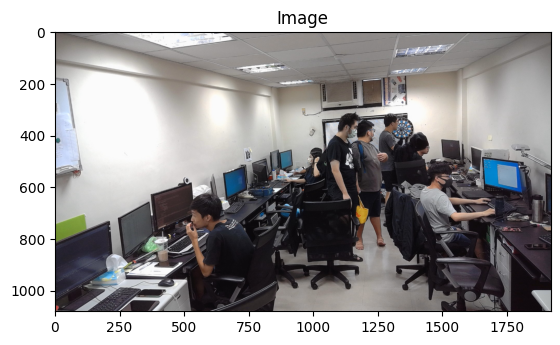

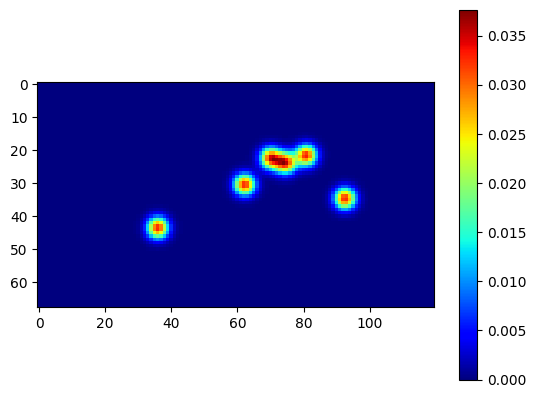

Image shape: (1080, 1920, 3)
Ground truth shape: (68, 120)


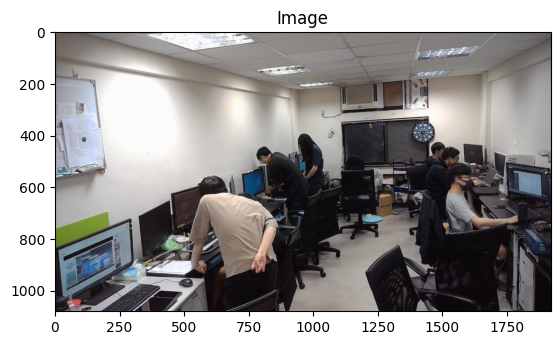

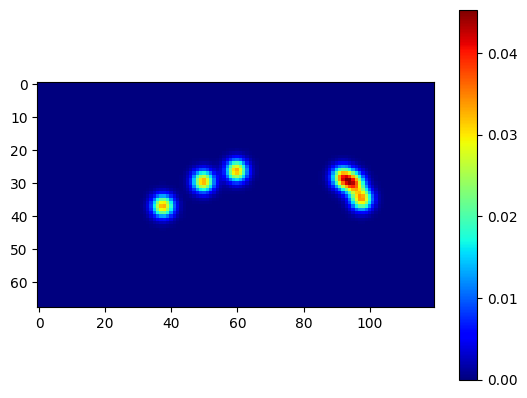

Image shape: (1080, 1920, 3)
Ground truth shape: (68, 120)


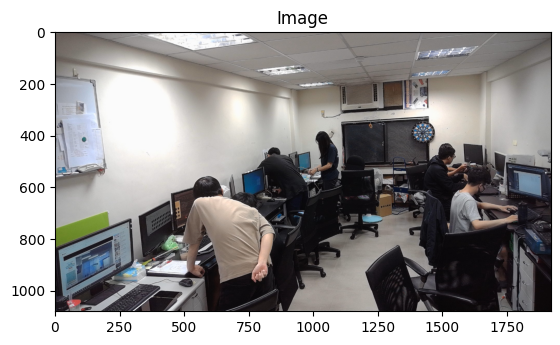

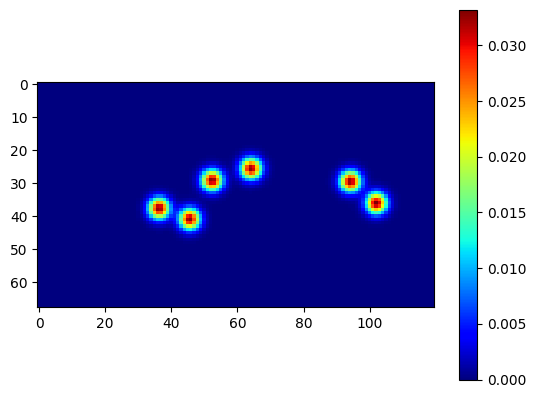

Image shape: (1080, 1920, 3)
Ground truth shape: (68, 120)


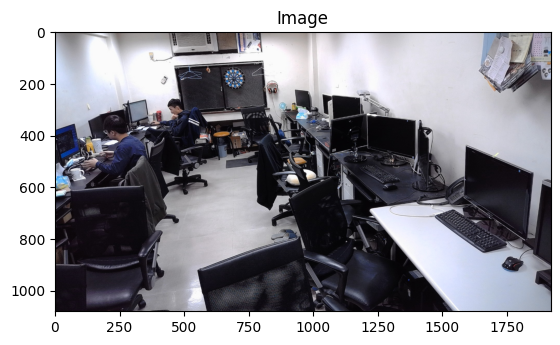

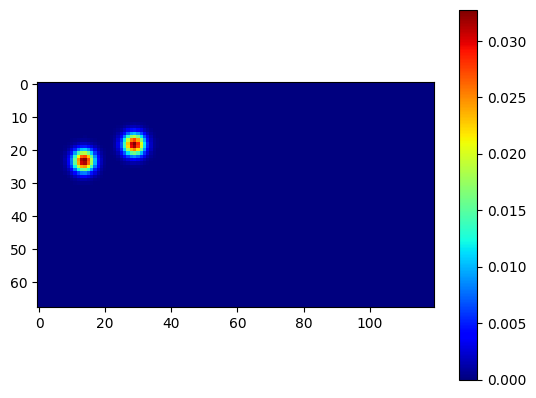

Image shape: (1080, 1920, 3)
Ground truth shape: (68, 120)


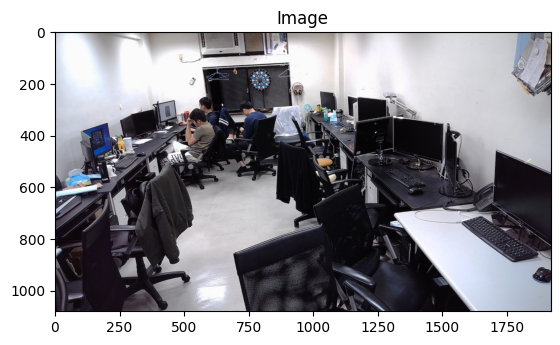

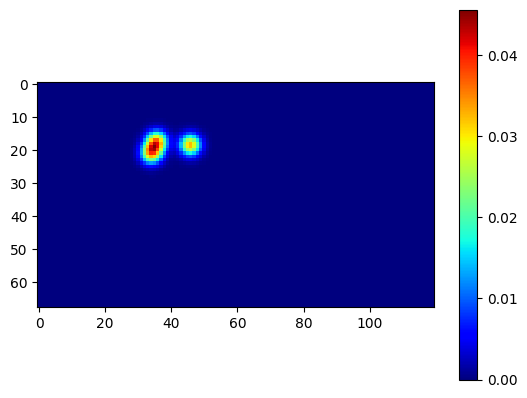

In [38]:
num_samples_to_display = 5
for img, ground_truth in dataset.take(num_samples_to_display):
    print("Image shape:", img.shape)
    print("Ground truth shape:", ground_truth.shape)
    img = img.numpy()
    ground_truth = ground_truth.numpy()

    # 顯示圖像
    plt.figure()
    plt.imshow(img)
    plt.title("Image")
    plt.show()

    plt.imshow(ground_truth, cmap=cm.jet)  # 使用 'viridis' 颜色映射
    plt.colorbar()  # 显示颜色条
    plt.show()

In [ ]:
# from imageio.plugins import available_plugins

# print(available_plugins())

ImportError: ignored

In [ ]:
# import shutil

# # 設定要刪除檔案的資料夾路徑
# folder_path = 'data/grounthtruth'

# # 使用 shutil.rmtree 刪除整個資料夾及其內容
# shutil.rmtree(folder_path)

In [3]:
file = os.listdir('data/images')
# print(file)
print(len(file))

75


In [4]:
# 總體結構
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
# 圖像輸入
img_input = Input(shape=(1080, 1920, 3))

# 使用MobileNetV2作為特徵提取層
mobilenetv2 = MobileNetV2(include_top=False, weights='imagenet', input_tensor=img_input)

x = mobilenetv2.layers[115].output
# x = mobilenetv2.layers[115].output
# 10753
x = Conv2D(filters=96, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1,groups=96,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=96,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=192,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=192,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=192,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=192,activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, strides=(1, 1), padding="same", dilation_rate=1, groups=192,activation='relu')(x)

# 最後輸出density map
density_map = Conv2D(filters=1, kernel_size=1, name='density_map')(x)

# 建立模型
model = Model(img_input, density_map)
model.summary()

9406464/9406464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1080, 1920, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 540, 960, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 540, 960, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
from tensorflow.keras.optimizers import Adam

# 创建Adam优化器并设置学习率
custom_optimizer = Adam(learning_rate=1e-3)

model.compile(loss='mean_squared_error', optimizer=custom_optimizer)
# model.fit(train_dataset,verbose=1,epochs=10)
model.fit(train_dataset, verbose=1,epochs=10)

Epoch 1/10
75/75 [==============================] - 21s 59ms/step - loss: 1.2004e-05
Epoch 2/10
75/75 [==============================] - 4s 58ms/step - loss: 1.1988e-05
Epoch 3/10
75/75 [==============================] - 4s 58ms/step - loss: 1.1992e-05
Epoch 4/10
75/75 [==============================] - 4s 58ms/step - loss: 1.1993e-05
Epoch 5/10
75/75 [==============================] - 4s 59ms/step - loss: 1.1993e-05
Epoch 6/10
75/75 [==============================] - 4s 58ms/step - loss: 1.1992e-05
Epoch 7/10
66/75 [=========================>....] - ETA: 0s - loss: 1.1362e-05

(1080, 1920, 3)
(1, 1080, 1920, 3)


1/1 [==============================] - 1s 731ms/step
預測 shape : (1, 68, 120, 1)
預測 density_map squeeze shape : (68, 120)
predict Count :  5.0


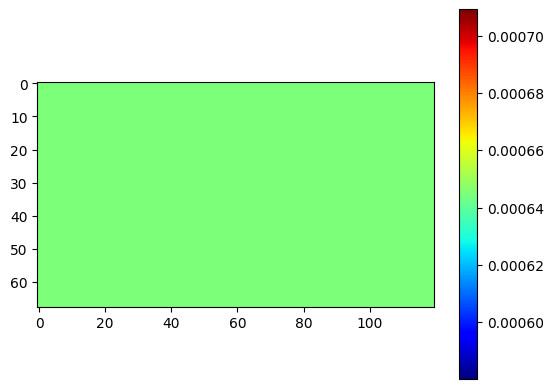

In [45]:
img1 = imread('5.jpg')
img2 = imread('1108.jpg')
imgs1 = np.asarray(img1, dtype=np.float32) / 255.0
imgs2 = np.asarray(img2, dtype=np.float32) / 255.0
print(img2.shape)
imgs2 = np.expand_dims(imgs2, axis=0)
print(imgs2.shape)
density_map = model.predict(imgs2)
# print("預測:", density_map)
print("預測 shape :", density_map.shape)
# # 創建密度圖

density_mapsq = density_map.squeeze()  # 這裡替換為你的密度圖

print("預測 density_map squeeze shape :", density_mapsq.shape)
print("predict Count : ", np.around(np.sum(density_mapsq)))
# 繪製等高線圖
plt.imshow(density_mapsq, cmap=cm.jet)
plt.colorbar()
plt.show()